# Ads Click Through Optimization (Thompson Sampling)

Since we have already run  **Upper Confidence Bound RL** on the Ads Click Through Optimization DataSet, It got **Ad#5** to be the most selected ad in 1000 rounds for it to be a significant jump over the other ads. **Upper Confidence Bound** is a **Deterministic** Approach whereas Thompson Sampling is a **Probabilistic** Approach. We predict the values of each Ad from the **Probabilty Distribution** of Each Ad and in each round, we draw one random sample from each ad's probability distribution. The ad that pulls the highest sampled value is the one we choose to show.

This probabilistic approach is known as Bayesian inference which naturally balances exploitation and exploration where as UCB had a **Upper Confidence Bound Value** after each and every turn. **Thompsons Sampling does not need to update after every turn** it can update after a bunch of turns and it does not affect the approach. This makes it Optimal For **Website Clicks and Ad clicks** where it would take a lot of processing power to update thousands of clicks immediately. 

**Our final Goal is to find out if Thompson Sampling can beat UCB by finding out that Ad#5 is significantly clicked upon in less than 1000 tries**


 ## Importing Libraries & dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [2]:
df=pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [4]:
df.isnull().sum()

Ad 1     0
Ad 2     0
Ad 3     0
Ad 4     0
Ad 5     0
Ad 6     0
Ad 7     0
Ad 8     0
Ad 9     0
Ad 10    0
dtype: int64

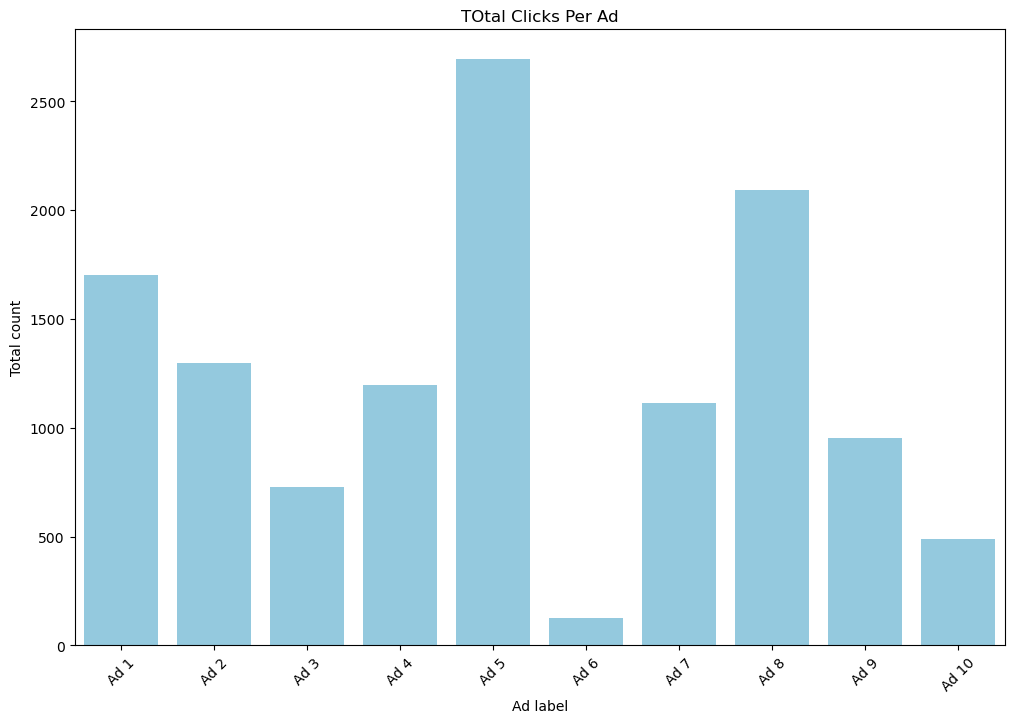

In [7]:
ad_sums=df.sum()
plt.figure(figsize=(12,8))
sns.barplot(x=ad_sums.index,y=ad_sums.values,color='skyblue')
plt.title('TOtal Clicks Per Ad')
plt.xlabel('Ad label')
plt.ylabel('Total count')
plt.xticks(rotation=45)
plt.show()

## Implementing Thompson Sampling

### How Thompson Sampling Works
1. At each round, we consider two numbers for each Ad i:

**Ni1(n)=number of times till round n the ad got the reward 1(or has been clicked by the customer)**

**Ni0(n)=number of times till round n the ad got the reward 0(or hasn't been clicked by the customer)**

2. For each Ad we take a **random draw from its distribution below using random betavariate**

   
**Probabilty Distribution= Beta Variate(Ni1(n)+1,Ni0(n)+1)**

4. Then we select the Ad with the **highest probability distribution**

In [40]:
d=10
N=10000
ad_selected_per_iteration=[]
number_of_rewards1=[0]*d
number_of_rewards0=[0]*d
total_reward=0
for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_betavariate=random.betavariate(number_of_rewards1[i]+1,number_of_rewards0[i]+1)
        if random_betavariate>max_random:
            max_random=random_betavariate
            ad=i
    ad_selected_per_iteration.append(ad)
    reward=df.values[n,ad]
    if reward==1:
        number_of_rewards1[ad]+=1
    else:
        number_of_rewards0[ad]+=1
    total_reward=total_reward+reward

In [41]:
print(ad_selected_per_iteration)

[9, 5, 8, 3, 2, 4, 6, 3, 7, 6, 2, 7, 0, 2, 1, 5, 3, 0, 8, 4, 8, 9, 8, 7, 9, 1, 5, 3, 0, 9, 9, 9, 7, 6, 2, 5, 3, 6, 4, 8, 1, 3, 3, 7, 4, 1, 0, 5, 7, 2, 9, 3, 8, 7, 6, 4, 1, 6, 9, 2, 7, 6, 4, 7, 7, 4, 6, 7, 7, 5, 0, 1, 0, 7, 9, 3, 4, 3, 4, 9, 0, 9, 4, 4, 8, 7, 8, 3, 2, 9, 4, 4, 8, 5, 5, 4, 4, 9, 4, 9, 2, 4, 3, 9, 1, 7, 1, 4, 7, 3, 4, 3, 3, 9, 4, 5, 7, 1, 1, 4, 3, 7, 4, 4, 1, 4, 3, 4, 1, 1, 8, 4, 9, 4, 3, 4, 3, 2, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 0, 6, 4, 7, 4, 1, 4, 4, 9, 1, 4, 4, 4, 1, 5, 1, 3, 4, 1, 1, 6, 3, 1, 4, 1, 4, 3, 3, 8, 1, 0, 4, 1, 1, 2, 8, 6, 3, 4, 4, 1, 9, 3, 3, 4, 4, 4, 1, 4, 4, 4, 4, 9, 4, 3, 1, 1, 4, 9, 4, 4, 4, 1, 4, 4, 4, 3, 1, 7, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 9, 0, 1, 4, 9, 4, 1, 4, 9, 4, 4, 8, 4, 8, 4, 4, 4, 0, 4, 9, 3, 3, 4, 4, 4, 3, 4, 3, 7, 1, 8, 4, 4, 0, 3, 7, 4, 1, 4, 4, 4, 9, 7, 9, 0, 2, 7, 2, 7, 4, 4, 4, 7, 4, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 6, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 7, 4, 4, 3, 4, 4, 4, 

## Plotting the Ads' selected most by Thompson Sampling

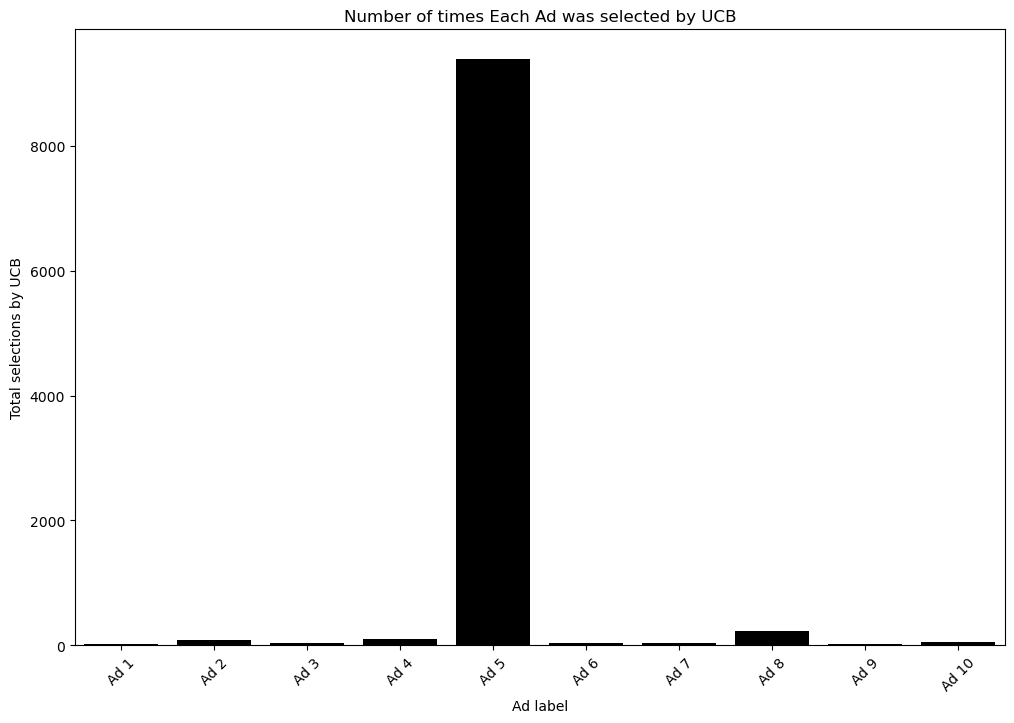

In [42]:
ad_count_series=pd.Series(ad_selected_per_iteration)
selection_counts=ad_count_series.value_counts().sort_index()
plt.figure(figsize=(12,8))
sns.barplot(x=ad_sums.index,y=selection_counts.values,color='black')
plt.title('Number of times Each Ad was selected by UCB')
plt.xlabel('Ad label')
plt.ylabel('Total selections by UCB')
plt.xticks(rotation=45)
plt.show()

## Now we can see Ad5 was selected above 9000 times out of 10000 and you can see a slimmer of the other ads. Now lets see how efficient Thompson Sampling is!

### Lets iterate the loop less and less until it reaches the highest number of tries UCB has made it. We will then see if Thompson Sampling is more efficient or less efficient than UCB for this dataset

In [49]:
d=10
N=10000
ad_selected_per_iteration1=[]
number_of_rewards11=[0]*d
number_of_rewards01=[0]*d
total_reward1=0
for n in range(0,500):
    ad1=0
    max_random1=0
    for i in range(0,d):
        random_betavariate1=random.betavariate(number_of_rewards11[i]+1,number_of_rewards01[i]+1)
        if random_betavariate1>max_random1:
            max_random1=random_betavariate1
            ad1=i
    ad_selected_per_iteration1.append(ad1)
    reward1=df.values[n,ad1]
    if reward1==1:
        number_of_rewards11[ad1]+=1
    else:
        number_of_rewards01[ad1]+=1
    total_reward1=total_reward1+reward1

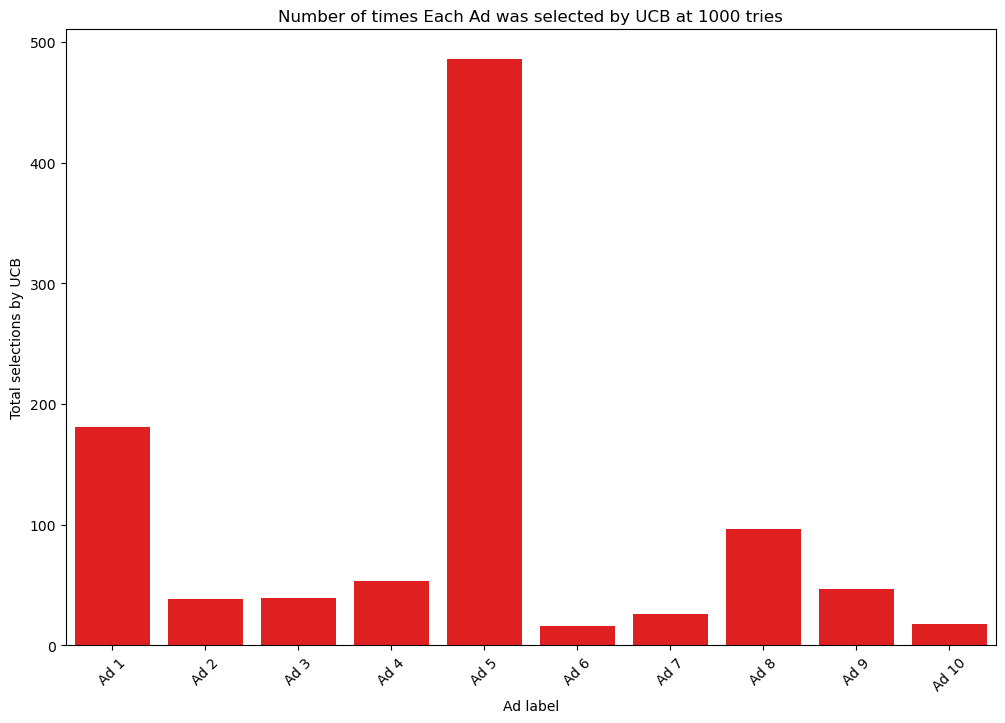

In [48]:
ad_count_series1=pd.Series(ad_selected_per_iteration1)
selection_counts1=ad_count_series1.value_counts().sort_index()
plt.figure(figsize=(12,8))
sns.barplot(x=ad_sums.index,y=selection_counts1.values,color='red')
plt.title('Number of times Each Ad was selected by UCB at 1000 tries')
plt.xlabel('Ad label')
plt.ylabel('Total selections by UCB')
plt.xticks(rotation=45)
plt.show()

## Now lets go to 500 tries

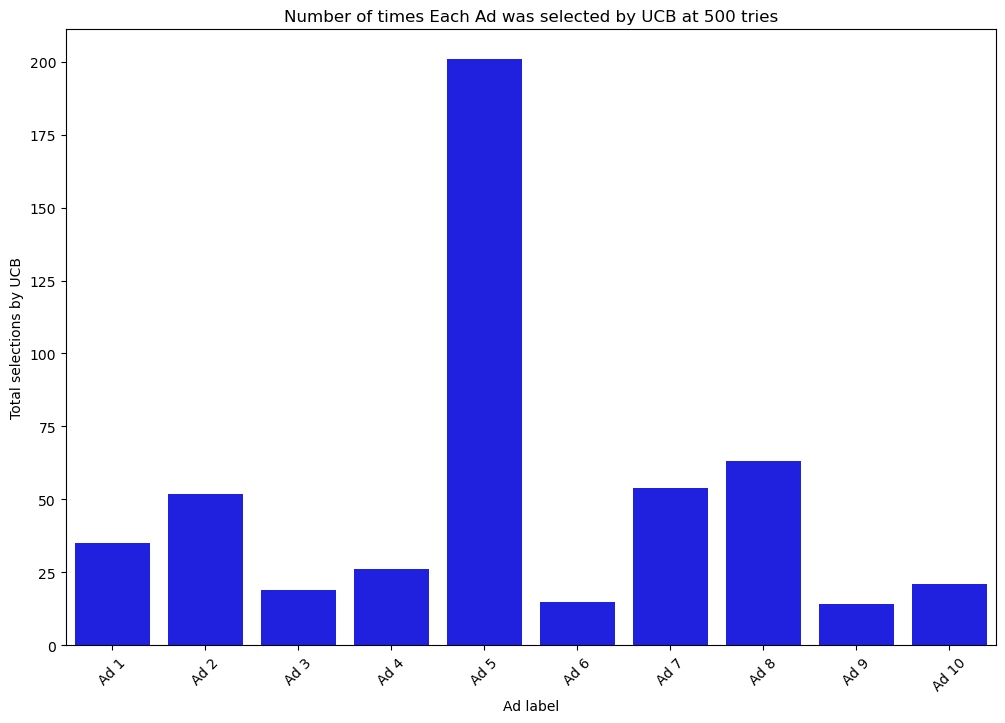

In [50]:
ad_count_series1=pd.Series(ad_selected_per_iteration1)
selection_counts1=ad_count_series1.value_counts().sort_index()
plt.figure(figsize=(12,8))
sns.barplot(x=ad_sums.index,y=selection_counts1.values,color='blue')
plt.title('Number of times Each Ad was selected by UCB at 500 tries')
plt.xlabel('Ad label')
plt.ylabel('Total selections by UCB')
plt.xticks(rotation=45)
plt.show()

## Thompsons sampling found out Ad#5 as the most optimal in 500 tries which UCB failed to find out. Thompsons sampling is more powerful than UCB in this dataset and many others.

##  Results: UCB vs. Thompson Sampling (at 500 Tries)

To compare the efficiency of the two algorithms, I ran both for a limited number of 500 rounds. This test highlights how quickly each algorithm can converge on the best option.

### 1. Upper Confidence Bound (UCB) at 500 Tries

As the bar chart shows, after 500 iterations, the UCB algorithm is still in a heavy **exploration** phase.

* While **Ad 5** has been identified as the most selected option (approx. 200 selections), the algorithm is not yet confident in this choice.
* It is still dedicating a significant number of selections to other ads (like Ad 8) to gather more data.
* This demonstrates that UCB, a deterministic algorithm, **failed to find and converge on the single best ad** within this short timeframe.

### 2. Thompson Sampling at 500 Tries

In contrast, my results from the Thompson Sampling algorithm showed that it **successfully identified Ad 5 as the most optimal** choice within the same 500 tries.

The probabilistic (Bayesian) approach of Thompson Sampling allowed it to become "confident" in Ad 5's superior performance much faster. It had already shifted from exploration to **exploitation**, dedicating the vast majority of its selections to Ad 5.

### Conclusion

This comparison clearly shows that **Thompson Sampling is more powerful and efficient** on this dataset. It was able to find the best ad and start maximizing the reward in a fraction of the time it took UCB, which was still wasting selections on less optimal ads.